In [511]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt

In [512]:
df
df = pd.read_csv("/content/data_clean.csv",index_col = 0)

In [513]:
df.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [514]:
df.describe(include = "object")

,Temp C,Month,Weather
count,158,158,155
unique,41,6,3
top,81,9,S
freq,11,34,59


In [515]:
#data types
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [516]:
df["Temp C"].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [517]:
df["Month"].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [518]:
#replace function
df["Month"].replace("May","5",inplace = True)

In [519]:
df["Month"].unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [520]:
df["Month"] = df["Month"].astype(int)

In [521]:
df["Month"].dtypes

dtype('int64')

In [522]:
#Temp C
df["Temp C"] = pd.to_numeric(df["Temp C"],errors = "coerce")

In [523]:
df["Temp C"].dtypes

dtype('float64')

In [524]:
#Droping Unecessary COLUMNS
df

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5,1,2010,67,S
2,36.0,118.0,8.0,72.0,5,2,2010,72,C
3,12.0,149.0,12.6,74.0,5,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5,4,2010,62,S
5,NaN,NaN,14.3,56.0,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67.0,5,1,2010,67,C
155,30.0,193.0,6.9,70.0,9,26,2010,70,PS
156,NaN,145.0,13.2,77.0,9,27,2010,77,S
157,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [525]:
df.drop(columns = ["Temp C","Year"], inplace = True)

In [526]:
df

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S
157,14.0,191.0,14.3,9,28,75,S


In [527]:
#Renaming the columns
df.rename(columns = {"Solar.R":"Solar"},inplace = True)

In [528]:
df

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S
157,14.0,191.0,14.3,9,28,75,S


In [529]:
#duplicated Records
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [530]:
df[df.duplicated()]

,Ozone,Solar,Wind,Month,Day,Temp,Weather
157,14.0,191.0,14.3,9,28,75,S


In [531]:
df[df.duplicated(keep = False)]

,Ozone,Solar,Wind,Month,Day,Temp,Weather
151,14.0,191.0,14.3,9,28,75,S
157,14.0,191.0,14.3,9,28,75,S


In [532]:
df.drop_duplicates(inplace = True)

In [533]:
df

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


# **Missing Value Imputation**

In [534]:
df.isna()

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,True,False,False,False,False,False,False


In [535]:
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

<Axes: >

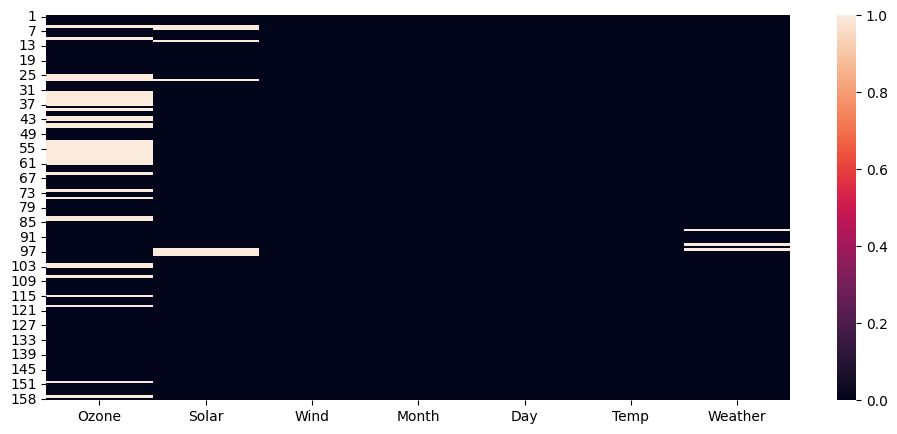

In [536]:
sns.heatmap(df.isna())

In [537]:
#calculating percentage
for i in df.isna().sum():
  print(f"missing Values :{i/len(df)*100}")

missing Values :24.203821656050955
missing Values :4.45859872611465
missing Values :0.0
missing Values :0.0
missing Values :0.0
missing Values :0.0
missing Values :1.910828025477707


In [538]:
#filling missing values
#Ozone colm with median
df["Ozone"] = df["Ozone"].fillna(df["Ozone"].median())

In [539]:
df["Ozone"].isna().sum()

0

In [540]:
#for solar col
df["Solar"] = df["Solar"].fillna(df["Solar"].median())

In [541]:
#for weather col
df["Weather"] = df["Weather"].fillna(df["Weather"].mode()[0])

In [542]:
df["Weather"].isna().sum()

0

<Axes: >

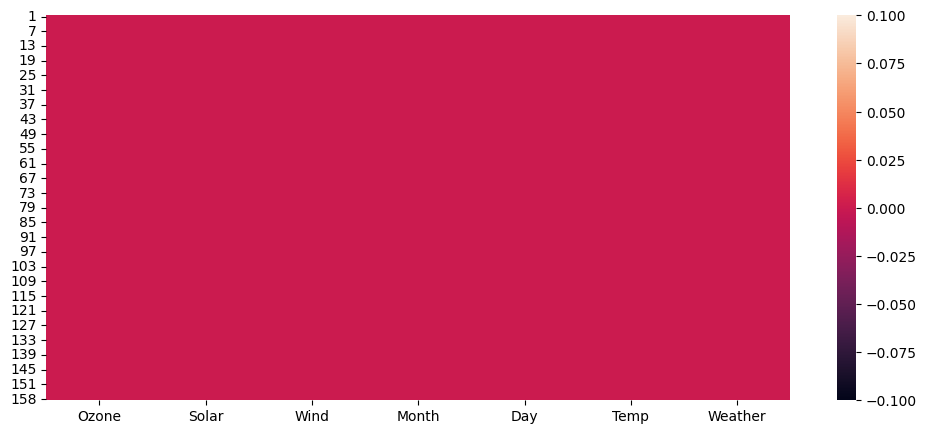

In [543]:
sns.heatmap(df.isna())

# **Outlier Detection**

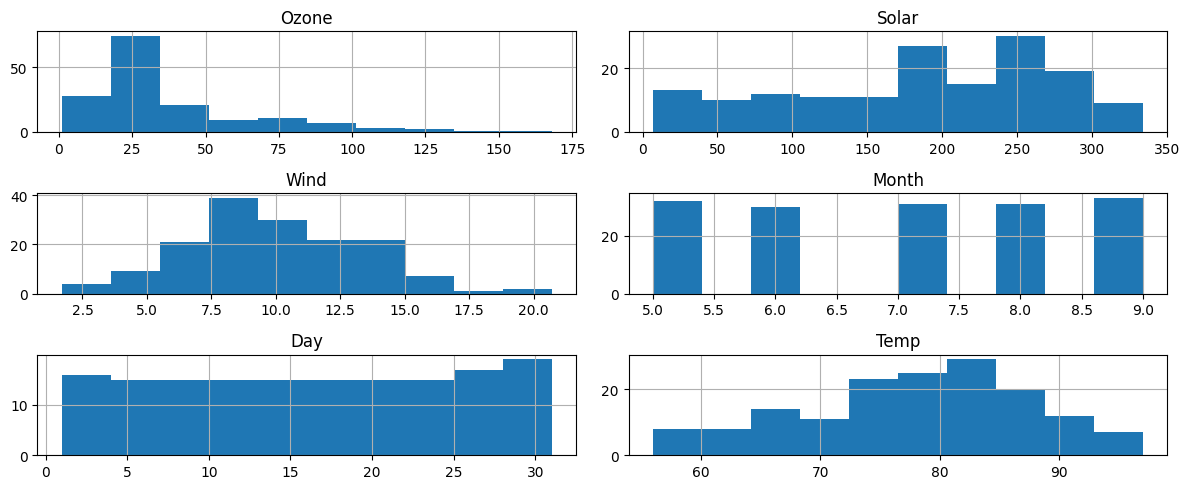

In [544]:
df.hist()
plt.tight_layout()

<Axes: >

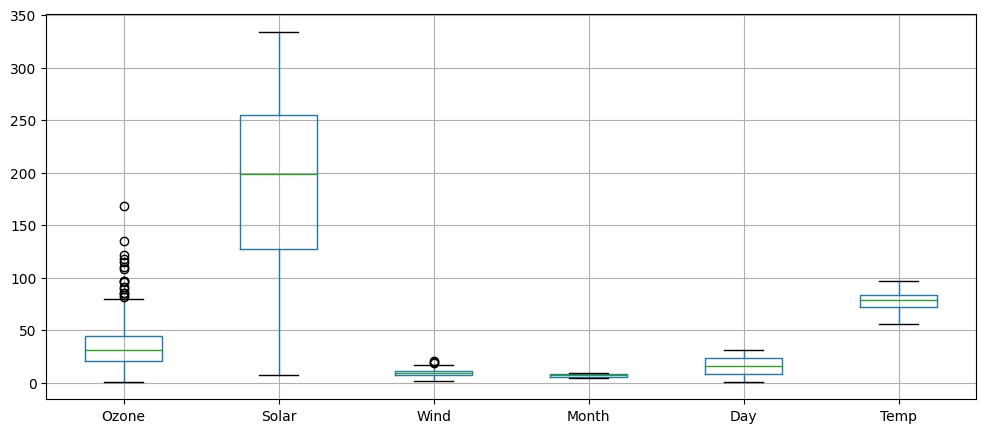

In [545]:
df.boxplot()

In [546]:
#ozone and wind column have outlier data points
def outlier_detection(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  upper = q3 + (1.5*iqr)
  lower = q1 - (1.5*iqr)
  return upper,lower

In [547]:
#Ozone col
outlier_detection(df,"Ozone")

(81.0, -15.0)

<Axes: xlabel='Ozone'>

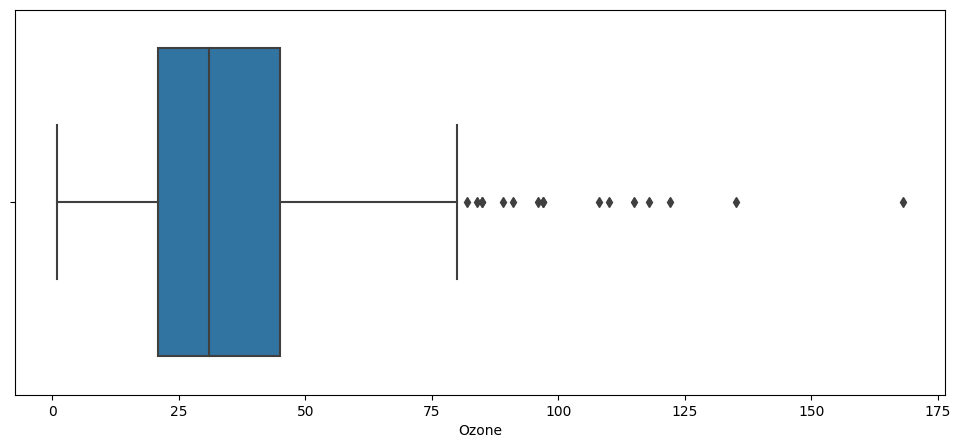

In [548]:
sns.boxplot(x = df["Ozone"])

In [549]:
df.loc[df["Ozone"] > 81.0,"Ozone"] = 81.0

<Axes: xlabel='Ozone'>

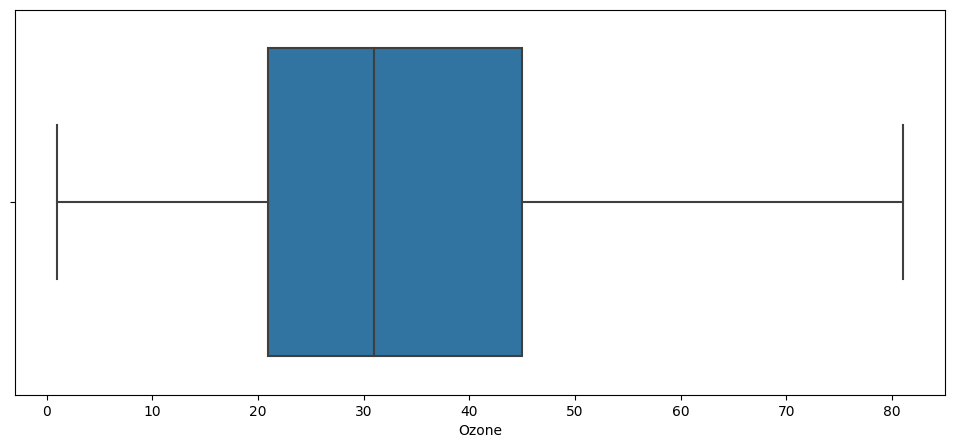

In [550]:
sns.boxplot(x = df["Ozone"])

<Axes: xlabel='Wind'>

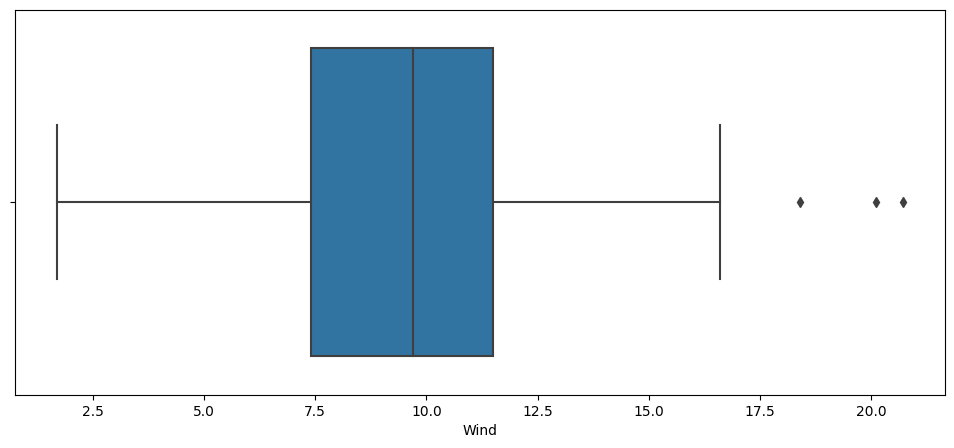

In [551]:
#for wind columns
sns.boxplot(x = df["Wind"])

In [552]:
outlier_detection(df,"Wind")

(17.65, 1.2500000000000009)

In [553]:
df[df["Wind"] > 17.65] = 17.65

<Axes: xlabel='Wind'>

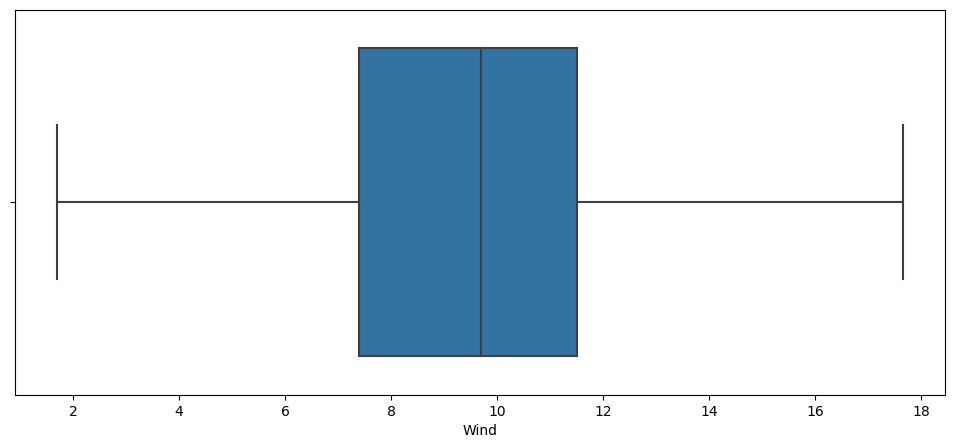

In [554]:
sns.boxplot(x = df["Wind"])

# **Transformation**

In [555]:
db = pd.get_dummies(data =df,columns = ["Weather"])

In [556]:
db

,Ozone,Solar,Wind,Month,Day,Temp,Weather_17.65,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,5.0,1.0,67.0,0,0,0,1
2,36.0,118.0,8.0,5.0,2.0,72.0,0,1,0,0
3,12.0,149.0,12.6,5.0,3.0,74.0,0,0,1,0
4,18.0,313.0,11.5,5.0,4.0,62.0,0,0,0,1
5,31.0,199.0,14.3,5.0,5.0,56.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30.0,68.0,0,0,0,1
154,41.0,190.0,7.4,5.0,1.0,67.0,0,1,0,0
155,30.0,193.0,6.9,9.0,26.0,70.0,0,0,1,0
156,31.0,145.0,13.2,9.0,27.0,77.0,0,0,0,1


In [557]:
df

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5.0,1.0,67.0,S
2,36.0,118.0,8.0,5.0,2.0,72.0,C
3,12.0,149.0,12.6,5.0,3.0,74.0,PS
4,18.0,313.0,11.5,5.0,4.0,62.0,S
5,31.0,199.0,14.3,5.0,5.0,56.0,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30.0,68.0,S
154,41.0,190.0,7.4,5.0,1.0,67.0,C
155,30.0,193.0,6.9,9.0,26.0,70.0,PS
156,31.0,145.0,13.2,9.0,27.0,77.0,S


In [558]:
db.drop(columns = ["Weather_17.65"],inplace = True)

In [559]:
db

,Ozone,Solar,Wind,Month,Day,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,5.0,1.0,67.0,0,0,1
2,36.0,118.0,8.0,5.0,2.0,72.0,1,0,0
3,12.0,149.0,12.6,5.0,3.0,74.0,0,1,0
4,18.0,313.0,11.5,5.0,4.0,62.0,0,0,1
5,31.0,199.0,14.3,5.0,5.0,56.0,0,0,1
...,...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30.0,68.0,0,0,1
154,41.0,190.0,7.4,5.0,1.0,67.0,1,0,0
155,30.0,193.0,6.9,9.0,26.0,70.0,0,1,0
156,31.0,145.0,13.2,9.0,27.0,77.0,0,0,1


# **Zomato Dataset**

In [560]:
df = pd.read_csv('https://raw.githubusercontent.com/Amritrajdubey/DATASETS/main/zomato.csv',encoding ='latin-1')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [561]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [563]:
df["Cuisines"]

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

<Axes: >

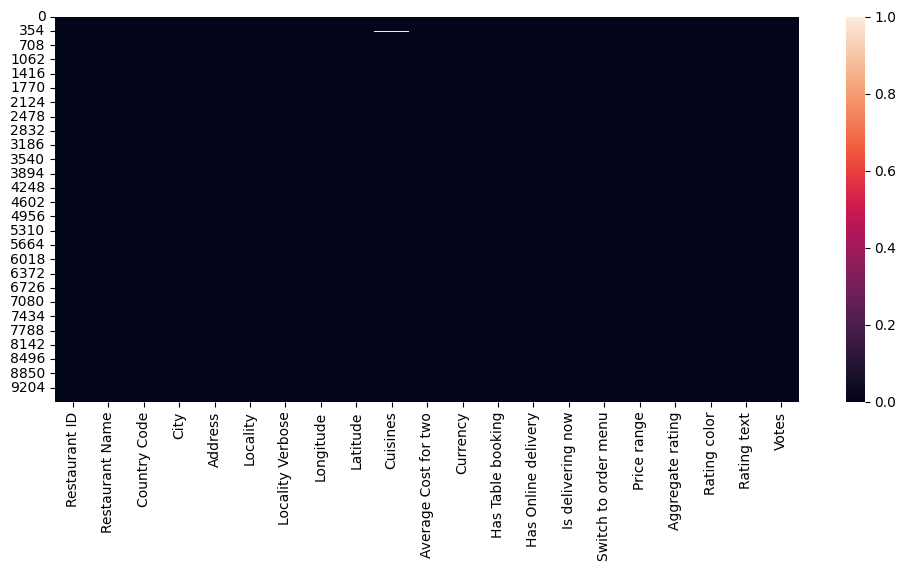

In [564]:
sns.heatmap(df.isna())

In [565]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [567]:
df.duplicated().sum()

0

In [568]:
df["Restaurant Name"]

0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                NamlÛ± Gurme
9547               Ceviz AÛôacÛ±
9548                       Huqqa
9549                Aôôk Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9551, dtype: object

In [569]:
#missing values
for i in df.isna().sum():
  print(f"Missing values : {((i/len(df))*100)}")

Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.09423097057899697
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0
Missing values : 0.0


In [570]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [571]:
df["City"].nunique()

141

In [572]:
df["Currency"].nunique()

12

In [573]:
df["Price range"].nunique()

4

In [574]:
df["Price range"].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [575]:
#droping unecessary columns
df.drop(columns = ["Restaurant Name","Locality Verbose","Locality"],inplace = True)

In [576]:
df

,Restaurant ID,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [577]:
df["Has Table booking"].nunique()

2

In [578]:
df["Has Table booking"].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [579]:
TableBooking_Yes = df[df["Has Table booking"]=="Yes"]
TableBooking_Yes

,Restaurant ID,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
4,6314302,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,6300781,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9403,6800569,215,Manchester,"19 Chapel Walks, City Center, Market Street, M...",-2.243505,53.481740,Thai,70,Pounds(£),Yes,No,No,No,4,4.3,Green,Very Good,422
9415,6801873,215,Manchester,"The Midland, Peter Street, Deansgate, Manchest...",-2.245034,53.477358,"European, Mediterranean, Contemporary",55,Pounds(£),Yes,No,No,No,3,4.2,Green,Very Good,67
9431,18295472,166,Doha,"Ground Floor, Al Jomrok Boutique Hotel, Souq W...",51.533316,25.289411,Indian,250,Qatari Rial(QR),Yes,No,No,No,4,4.7,Dark Green,Excellent,114
9450,6400621,189,Cape Town,"One & Only Hotel, Dock Road, V & A Waterfront,...",18.416435,-33.908603,"Japanese, Asian, Seafood, Sushi",535,Rand(R),Yes,No,No,No,4,4.0,Green,Very Good,110


In [580]:
TableBooking_No = df[df["Has Table booking"]=="No"]
TableBooking_No

,Restaurant ID,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3,6318506,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
5,18189371,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...",121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
10,6309903,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
12,6318433,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...",121.075419,14.649503,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
14,6314605,162,San Juan City,"17 J. Abad Santos Drive, Little Baguio, San Ju...",121.038110,14.598890,Korean,700,Botswana Pula(P),No,No,No,No,3,4.3,Green,Very Good,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


<Axes: xlabel='count', ylabel='Has Table booking'>

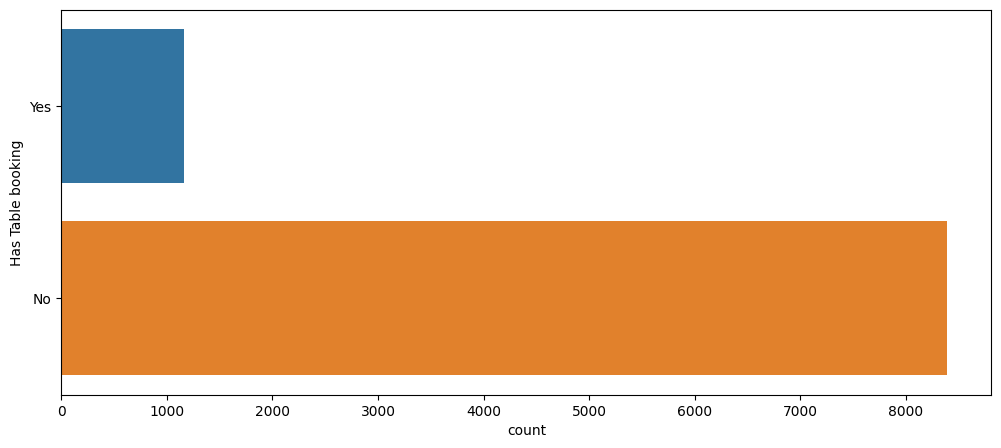

In [581]:
sns.countplot(y = df["Has Table booking"])

In [582]:
df.columns

Index(['Restaurant ID', 'Country Code', 'City', 'Address', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [583]:
df["Has Online delivery"].nunique()

2

In [584]:
df["Has Online delivery"].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

<Axes: xlabel='Has Online delivery', ylabel='count'>

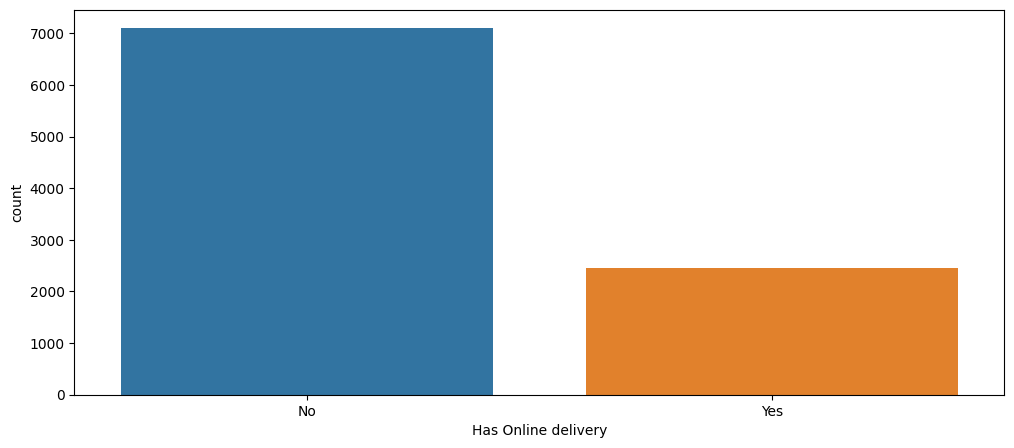

In [585]:
sns.countplot(x = df["Has Online delivery"])

In [586]:
Hasonline_yes = df[df["Has Online delivery"] == "Yes"]
Hasonline_yes

,Restaurant ID,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
565,5704255,214,Abu Dhabi,"Near The One, Level 3, Abu Dhabi Mall, Tourist...",54.382946,24.495693,American,260,Emirati Diram(AED),No,Yes,No,No,4,4.6,Dark Green,Excellent,376
566,5701978,214,Abu Dhabi,Near Corner of Salam and Al Falah Street (9th ...,54.381931,24.485579,"Italian, Pizza",150,Emirati Diram(AED),Yes,Yes,No,No,3,4.4,Green,Very Good,471
571,5700052,214,Abu Dhabi,"Crowne Plaza Abu Dhabi, Sheikh Hamdan Bin Moha...",54.365694,24.491235,"Thai, Japanese, Chinese, Indonesian, Vietnamese",350,Emirati Diram(AED),Yes,Yes,No,No,4,4.4,Green,Very Good,246
572,5702418,214,Abu Dhabi,"Ground Level, Next to E-Max, Dalma Mall, Mussa...",54.524122,24.334217,"Indian, North Indian, Mughlai, Biryani",120,Emirati Diram(AED),Yes,Yes,No,No,3,4.0,Green,Very Good,355
573,5700386,214,Abu Dhabi,"Opposite Cristal Hotel, Behind KM Trading, Ele...",54.363776,24.485253,"Indian, South Indian",60,Emirati Diram(AED),No,Yes,No,No,2,3.6,Yellow,Good,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,11371,1,Pune,"UG 49, Phoenix Market City, Nagar Road, Viman ...",73.916619,18.562450,"Mexican, American, Tex-Mex",1800,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.5,Dark Green,Excellent,1439
9168,18292672,1,Pune,"Punawale, Near Basket Bridge,Off Aundh-Ravet B...",73.751081,18.636215,"North Indian, Chinese, Continental",1500,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.2,Green,Very Good,487
9170,6507967,1,Pune,"Plot 64, Shivaji Housing Society, Senapati Bap...",73.828972,18.530963,"Italian, Continental, Cafe",800,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.1,Green,Very Good,997
9171,6506206,1,Pune,"8th & 9th Floor, Spot 18 Mall, Pimple Saudagar...",73.785901,18.593481,"North Indian, Mediterranean, Chinese",2100,Indian Rupees(Rs.),Yes,Yes,No,No,4,3.6,Yellow,Good,1566


In [587]:
Hasonline_No = df[df["Has Online delivery"] == "No"]
Hasonline_No

,Restaurant ID,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [588]:
df["Price range"].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

<Axes: xlabel='Price range', ylabel='count'>

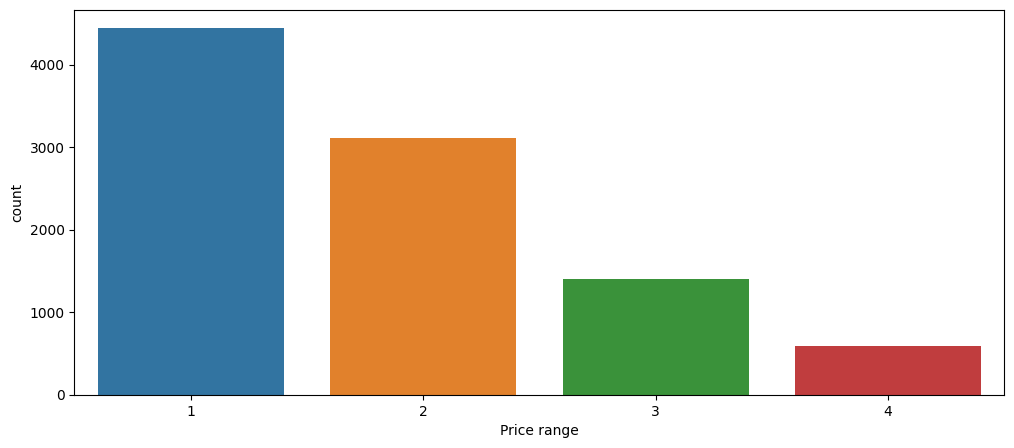

In [589]:
sns.countplot(x = df["Price range"])

In [590]:
df.columns

Index(['Restaurant ID', 'Country Code', 'City', 'Address', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [591]:
df["Aggregate rating"].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

In [592]:
df["Aggregate rating"].nunique()

33

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

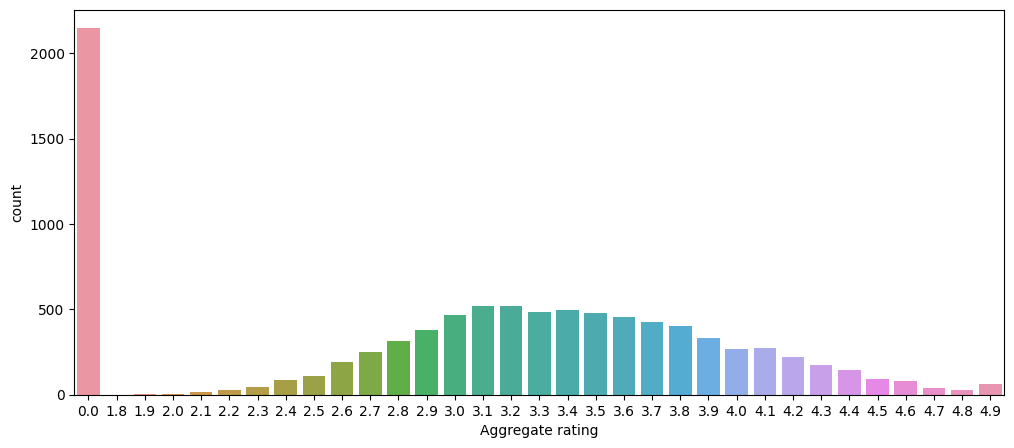

In [593]:
sns.countplot(x = df["Aggregate rating"])
plt.tight_layout

In [594]:
df["Country Code"].nunique()

15

In [595]:
df

,Restaurant ID,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [596]:
df1 = pd.read_excel("/content/Country-Code.xlsx")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [597]:
# Merging both the datasets
df=pd.merge(df,df1,on ='Country Code',how='left')

In [598]:
df

,Restaurant ID,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [599]:
df.columns

Index(['Restaurant ID', 'Country Code', 'City', 'Address', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [600]:
country_val = df["Country"].value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

In [601]:
country_names = Df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7bc66615bd00>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

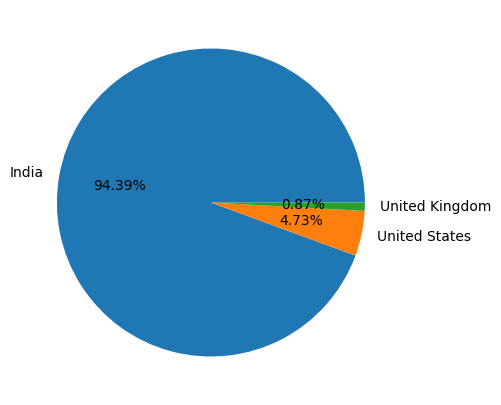

In [602]:
plt.figure(figsize=(5,5))
plt.pie(country_val[:3],labels=country_names[:3],autopct="%.2f%%")

In [603]:
values = df["Has Online delivery"].value_counts().values

In [604]:
index = df["Has Online delivery"].value_counts().index
index

Index(['No', 'Yes'], dtype='object')

([<matplotlib.patches.Wedge at 0x7bc6671f0a90>,
 [Text(-0.7614681082348079, 0.7938301582462732, 'No'),
  Text(0.7614681825585476, -0.7938300869524803, 'Yes')],
 [Text(-0.4153462408553497, 0.4329982681343308, '74.34%'),
  Text(0.41534628139557145, -0.43299822924680736, '25.66%')])

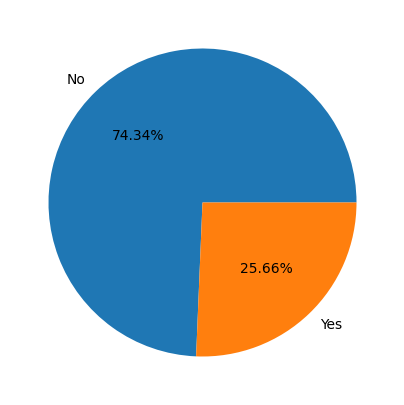

In [605]:
plt.pie(values,labels = index,autopct="%.2f%%")

In [606]:
df.columns

Index(['Restaurant ID', 'Country Code', 'City', 'Address', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [607]:
df["Aggregate rating"].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

In [608]:
values = df["Aggregate rating"].value_counts().values
values

array([2148,  522,  519,  498,  483,  480,  468,  458,  427,  400,  381,
        335,  315,  274,  266,  250,  221,  191,  174,  144,  110,   95,
         87,   78,   61,   47,   42,   27,   25,   15,    7,    2,    1])

In [609]:
index = df["Aggregate rating"].value_counts().index
index

Float64Index([0.0, 3.2, 3.1, 3.4, 3.3, 3.5, 3.0, 3.6, 3.7, 3.8, 2.9, 3.9, 2.8,
              4.1, 4.0, 2.7, 4.2, 2.6, 4.3, 4.4, 2.5, 4.5, 2.4, 4.6, 4.9, 2.3,
              4.7, 2.2, 4.8, 2.1, 2.0, 1.9, 1.8],
             dtype='float64')

([<matplotlib.patches.Wedge at 0x7bc665e12b90>,
 [Text(-0.052189657032845206, 1.0987612296121456, '0.0'),
  Text(-0.9715015490461956, -0.5159309451863133, '3.2'),
  Text(-0.3233254403602765, -1.0514088926843987, '3.1'),
  Text(0.49606401276109907, -0.9817945280166093, '3.4'),
  Text(1.0279743862727775, -0.39149541653397013, '3.3')],
 [Text(-0.028467085654279196, 0.5993243070611702, '51.51%'),
  Text(-0.5299099358433793, -0.2814168791925345, '12.52%'),
  Text(-0.17635933110560534, -0.5734957596460356, '12.45%'),
  Text(0.2705803705969631, -0.5355242880090595, '11.94%'),
  Text(0.5607133016033331, -0.2135429544730746, '11.58%')])

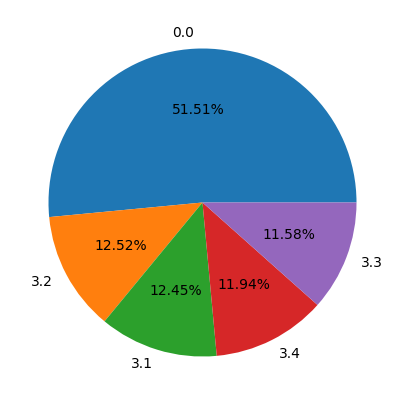

In [610]:
plt.pie(values[:5],labels=index[:5],autopct="%.2f%%")

In [611]:
df.columns

Index(['Restaurant ID', 'Country Code', 'City', 'Address', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [612]:
df.groupby(["Aggregate rating","Rating color","Rating text"]).size().count

<bound method Series.count of Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average   

In [613]:
rating = df.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns = {0:"Rating Count"})
rating

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

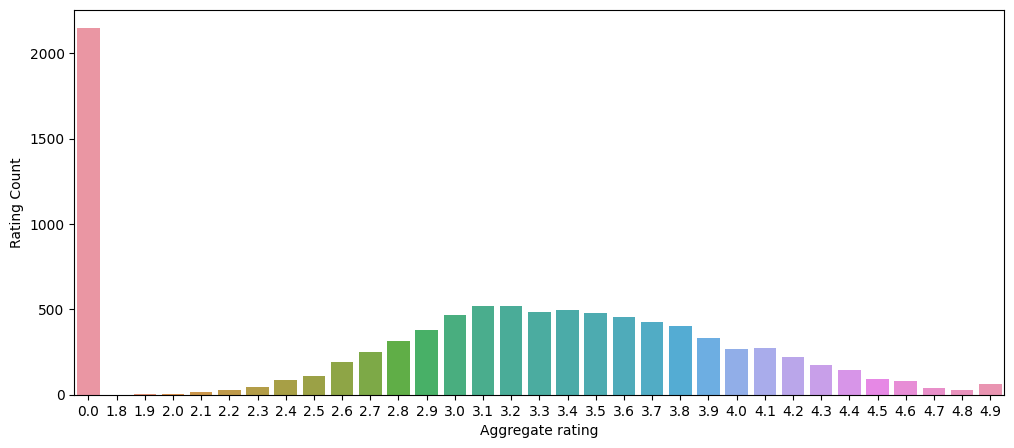

In [614]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,5)
sns.barplot(x = "Aggregate rating",y = "Rating Count",data =rating)

In [615]:
rating.groupby(["Rating color"]).size()

Rating color
Dark Green     5
Green          5
Orange        10
Red            7
White          1
Yellow         5
dtype: int64

<Axes: xlabel='Rating color', ylabel='count'>

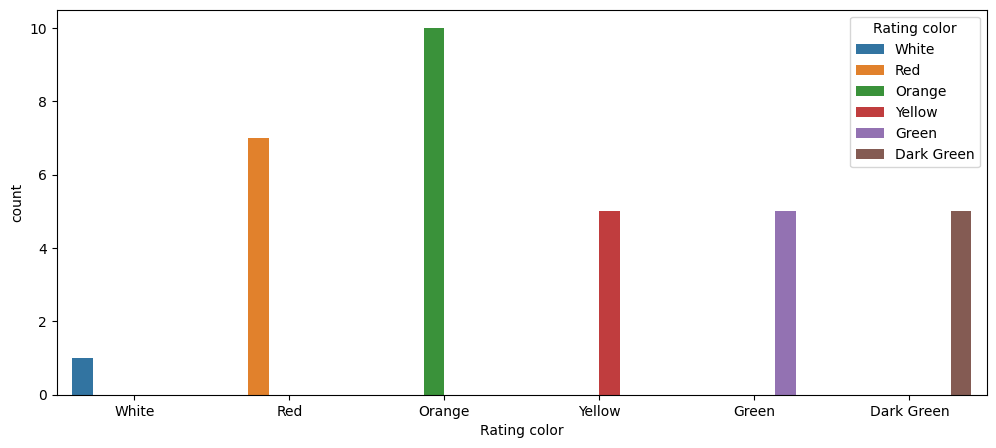

In [616]:
sns.countplot(x = "Rating color",data = rating,hue = "Rating color")

In [617]:
df

,Restaurant ID,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [618]:
df.isna().sum()

Restaurant ID           0
Country Code            0
City                    0
Address                 0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [619]:
df.dropna(inplace = True)

In [620]:
df

,Restaurant ID,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [621]:
df.columns

Index(['Restaurant ID', 'Country Code', 'City', 'Address', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [623]:
df_cu = df.groupby(["Cuisines","Country","Price range"]).size().reset_index().rename(columns = {0:"Cuisines Count"})
df_cu

,Cuisines,Country,Price range,Cuisines Count
0,Afghani,India,1,1
1,Afghani,India,2,3
2,"Afghani, Mughlai, Chinese",India,2,1
3,"Afghani, North Indian",India,2,1
4,"Afghani, North Indian, Pakistani, Arabian",India,2,1
...,...,...,...,...
2455,"Western, Asian, Cafe",Indonesia,3,1
2456,"Western, Fusion, Fast Food",Singapore,4,1
2457,World Cuisine,Turkey,3,1
2458,"World Cuisine, Mexican, Italian",Turkey,4,1


In [625]:
values = df_cu.Cuisines.value_counts().values
values

array([16, 14, 12, ...,  1,  1,  1])

In [627]:
index = df_cu.Cuisines.value_counts().index
index

Index(['Cafe', 'Italian', 'American', 'Chinese', 'Indian', 'Italian, Pizza',
       'Mexican', 'Asian', 'Thai', 'Pizza',
       ...
       'Continental, Fast Food, Asian, Italian',
       'Continental, European, North Indian, French',
       'Continental, European, North Indian',
       'Continental, European, Asian, North Indian, Chinese, Italian',
       'Continental, Chinese, Thai, Mughlai, North Indian',
       'Continental, Chinese, Thai, Mediterranean',
       'Continental, Chinese, Thai, Malaysian, North Indian',
       'Continental, Chinese, Thai',
       'Continental, Chinese, North Indian, Mughlai',
       'World Cuisine, Patisserie, Cafe'],
      dtype='object', length=1825)

([<matplotlib.patches.Wedge at 0x7bc665fcda80>,
 [Text(0.9947928752251085, 0.46945408231408725, 'Cafe'),
  Text(0.32836628218627856, 1.0498455051688136, 'Italian'),
  Text(-0.44186498201010443, 1.0073506527883973, 'American'),
  Text(-0.9526279484541088, 0.5499999925673781, 'Chinese'),
  Text(-1.0962429433144842, -0.0908372678651042, 'Indian'),
  Text(-0.8491083369707444, -0.6992960975772545, 'Italian, Pizza'),
  Text(-0.3283663313330936, -1.0498454897968774, 'Mexican'),
  Text(0.2700340003861216, -1.0663403015151722, 'Asian'),
  Text(0.788460742122101, -0.7670265041915212, 'Thai'),
  Text(1.0663402825533637, -0.2700340752646098, 'Pizza')],
 [Text(0.5426142955773319, 0.2560658630804112, '14.04%'),
  Text(0.17910888119251556, 0.5726430028193529, '12.28%'),
  Text(-0.2410172629146024, 0.5494639924300349, '10.53%'),
  Text(-0.519615244611332, 0.2999999959458426, '9.65%'),
  Text(-0.597950696353355, -0.049547600653693194, '9.65%'),
  Text(-0.4631500019840423, -0.3814342350421388, '9.65%'),

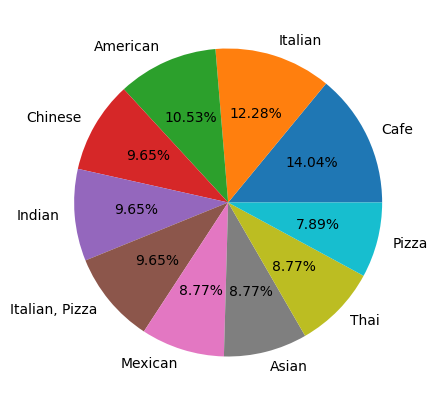

In [628]:
plt.pie(values[:10],labels = index[:10],autopct = "%0.2f%%" )

In [ ]:
cu